In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular_Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [3]:
## Categorial to continous
EAct = {"Yes": 1, "No": 0}
df.Extracurricular_Activities = df.Extracurricular_Activities.apply(lambda x: EAct[x])
df.head()

,Hours Studied,Previous Scores,Extracurricular_Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [4]:
##df = pd.concat([df, pd.get_dummies(df.Extracurricular_Activities, drop_first=True)], axis=1)

##df.rename(columns="yes": "Extracurricular_Activities", inplace=True)
##df

In [5]:
y = df["Performance Index"]

In [6]:
x = df.drop("Performance Index", axis=1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
train_mse = mean_squared_error(train_pred, y_train)
train_r2 = r2_score(train_pred, y_train)

test_mse = mean_squared_error(test_pred, y_test)
test_r2 = r2_score(test_pred, y_test)

In [14]:
print("Train")
print("mse: ", train_mse)
print("R2: ", train_r2)

print("Test")
print("mse: ", test_mse)
print("R2: ", test_r2)

Train
mse:  4.129935563527129
R2:  0.9886655626011184
Test
mse:  4.240506963418068
R2:  0.9884244782558135


In [15]:
res = y_test - test_pred

<Axes: xlabel='Performance Index', ylabel='Density'>

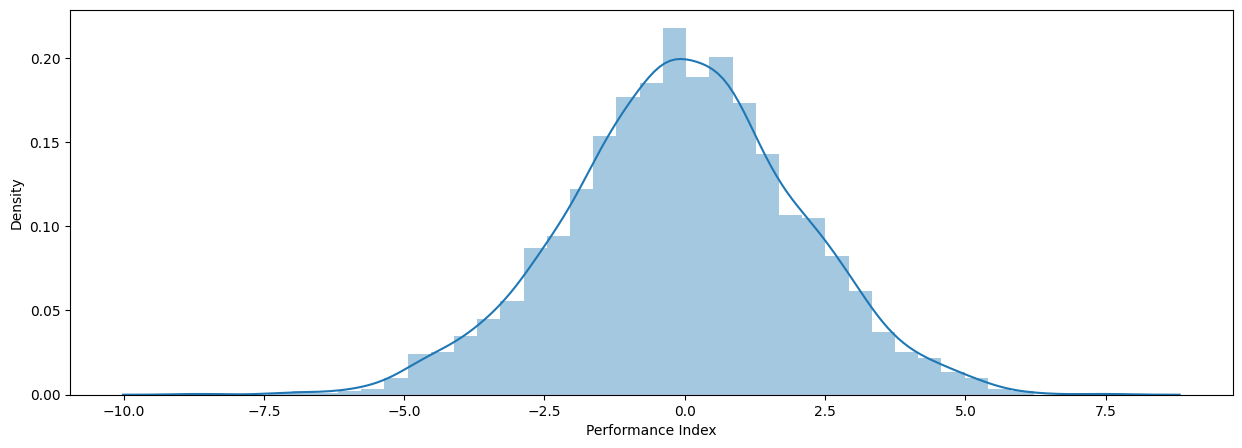

In [16]:
plt.figure(figsize=(15, 5))
sns.distplot(res)

In [17]:
print("the accuracy of this model is ",train_r2*100,"%")

the accuracy of this model is  98.86655626011184 %


In [19]:
custom = pd.read_csv("new.csv")
custom
self = lr.predict(custom)

print(self)

[88.44140097 79.03933973 91.40640291 77.60363617 67.39017651]
